In [267]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import math

In [268]:
test1 = pd.read_csv('./data/test_sample.csv')
train1 = pd.read_csv('./data/train_sample.csv')
test2 = pd.read_csv('./data/test_sample_2.csv')
train2 = pd.read_csv('./data/train_sample_2.csv')

In [269]:
print(f"Det första testdatasetet har {test1.shape[0]}st datapunkter och {test1.shape[1]}st attribut")
print(f"Det första träningsdatasetet har {train1.shape[0]}st datapunkter och {train1.shape[1]}st attribut")
print(f"Det andra testdatasetet har {test2.shape[0]}st datapunkter och {test2.shape[1]}st attribut")
print(f"Det andra träningsdatasetet har {train2.shape[0]}st datapunkter och {train2.shape[1]}st attribut")

Det första testdatasetet har 1000st datapunkter och 785st attribut
Det första träningsdatasetet har 5000st datapunkter och 785st attribut
Det andra testdatasetet har 1000st datapunkter och 785st attribut
Det andra träningsdatasetet har 5000st datapunkter och 782st attribut


### Vi ser direkt att det andra träningssetet har 3st färre attribut än dom övriga

In [270]:
test1.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [271]:
train1.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [272]:
test2.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [273]:
train2.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
Length: 782, dtype: int64

### Efter att ha kontrollerat om det saknas värden så ser jag även att attributen är pixlar och att som vi skrev tidigare så saknar det andra träningssetet 3 pixlar.
### Med tanke på att träningsdatan saknar 3 pixlar så om vi tränar modellen så när vi sedan ska testa den med testdatan så kommer det inte fungera eftersom att det är olika många attribut. En till sak som inte fungerar är att om till 28x28 när vi vill rita ut siffrorna.
### Jag väljer därför att gå vidare med det första paret av träning och testdata

In [274]:
def image_show(i, data, label):
    x = data.values[i] # get the vectorized image
    x = x.reshape((28,28)) # reshape it into 28x28 format
    print(f'The image label of index {i} is {label[i]}.')
    plt.imshow(x, cmap='gray') # show the image

In [275]:
def one_of_each(df):
    unique_labels = df['label'].unique()
    num_labels = len(unique_labels)
    fig, axes = plt.subplots(nrows=math.ceil(num_labels/10), ncols=10, figsize=(16, 7))
    for i, label in enumerate(unique_labels):
        index = df[df.label == label].index[0]
        x = df.drop(columns='label').values[index]
        x = x.reshape((28,28))
        axes[i].imshow(x, cmap='gray')
        axes[i].set_title(label)
        axes[i].axis('off')
    plt.show()

In [276]:
train_data = train1.drop(columns='label')
train_labels = train1['label']

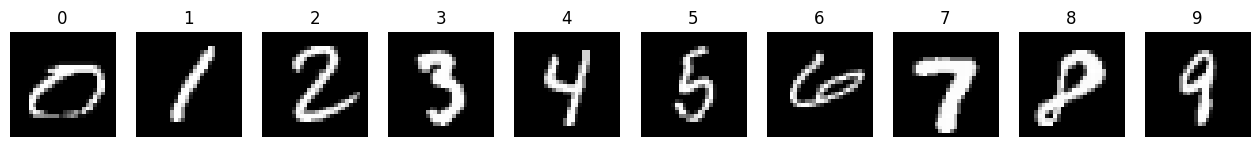

In [277]:
one_of_each(train1)

### Ovanför så ser vi klasserna som finns i datasetet, det är siffror från 0-9 och jag har även ritat ut en av vardera.

In [386]:
knn = KNeighborsClassifier(n_neighbors=5)

In [387]:
knn.fit(train_data, train_labels)

KNeighborsClassifier()

In [388]:
test_data = test1.drop(columns='label')
test_labels = test1['label']

In [389]:
knn.score(test_data,test_labels)

0.945

### Vi testar vad som är bästa värdet på K, då det är bäst att ha en ojämn siffra så steppar vi i loopen.

In [282]:
k_value = []
scores = []
for x in range(1,100,2):
    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(train_data, train_labels)
    score = knn.score(test_data,test_labels)
    k_value.append(x)
    scores.append(score)

Text(0.5, 0, 'K_value')

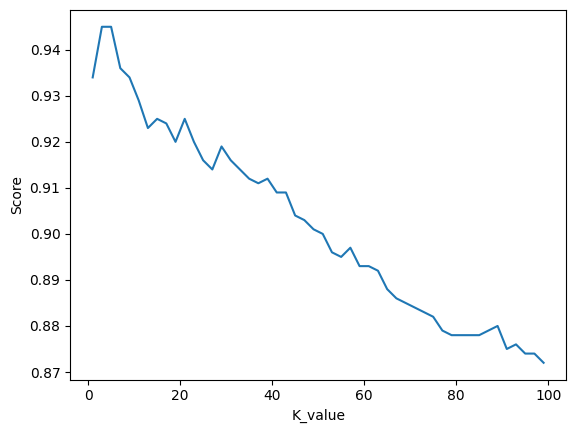

In [283]:
plt.plot(k_value,scores)
plt.ylabel('Score')
plt.xlabel('K_value')

### Som man ser i grafen så får vi bäst score med antingen 3 eller 5 som K-värde, en vanlig sak annars är att man tar roten ur antalet datapunkter.

In [390]:
label_pred = knn.predict(test_data)

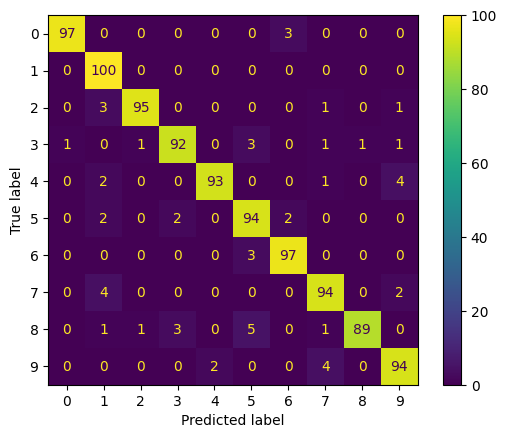

In [391]:
lab = test_labels.unique()
lab = sorted(lab)
cm = confusion_matrix(test_labels, label_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lab)
disp.plot()
plt.show()

### Som vi ser så har nästan varje siffra ett antal fel, men 1or verkar den ha lätt att klassificera, jag kommer att rita ut och fortsätta min formulering nedan om vad den gör för fel.

In [392]:
incorrect_indexes = [i for i in range(len(label_pred)) if label_pred[i] != test_labels[i]]

In [393]:
def plot_images(indexes, data, labels, model):
    num_images = len(indexes)
    fig, axs = plt.subplots(math.ceil(num_images/8), 8, figsize=(16,math.ceil(num_images/8)))
    axs = axs.flatten()

    for i, index in enumerate(indexes):
        predicted_label = model.predict([data.values[index]])[0]
        img = data.iloc[index].values.reshape(28,28)
        label = labels[index]
        axs[i].imshow(img, cmap='gray')
        axs[i].set_title(f"Label: {label}\n Predicted Label: {predicted_label}")
        axs[i].axis('off')
    
    plt.tight_layout()
    plt.show()

c:\Programmering\MachineLearning-SchoolProjects\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Programmering\MachineLearning-SchoolProjects\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Programmering\MachineLearning-SchoolProjects\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Programmering\MachineLearning-SchoolProjects\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Programmering\MachineLearning-SchoolProjects\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNe

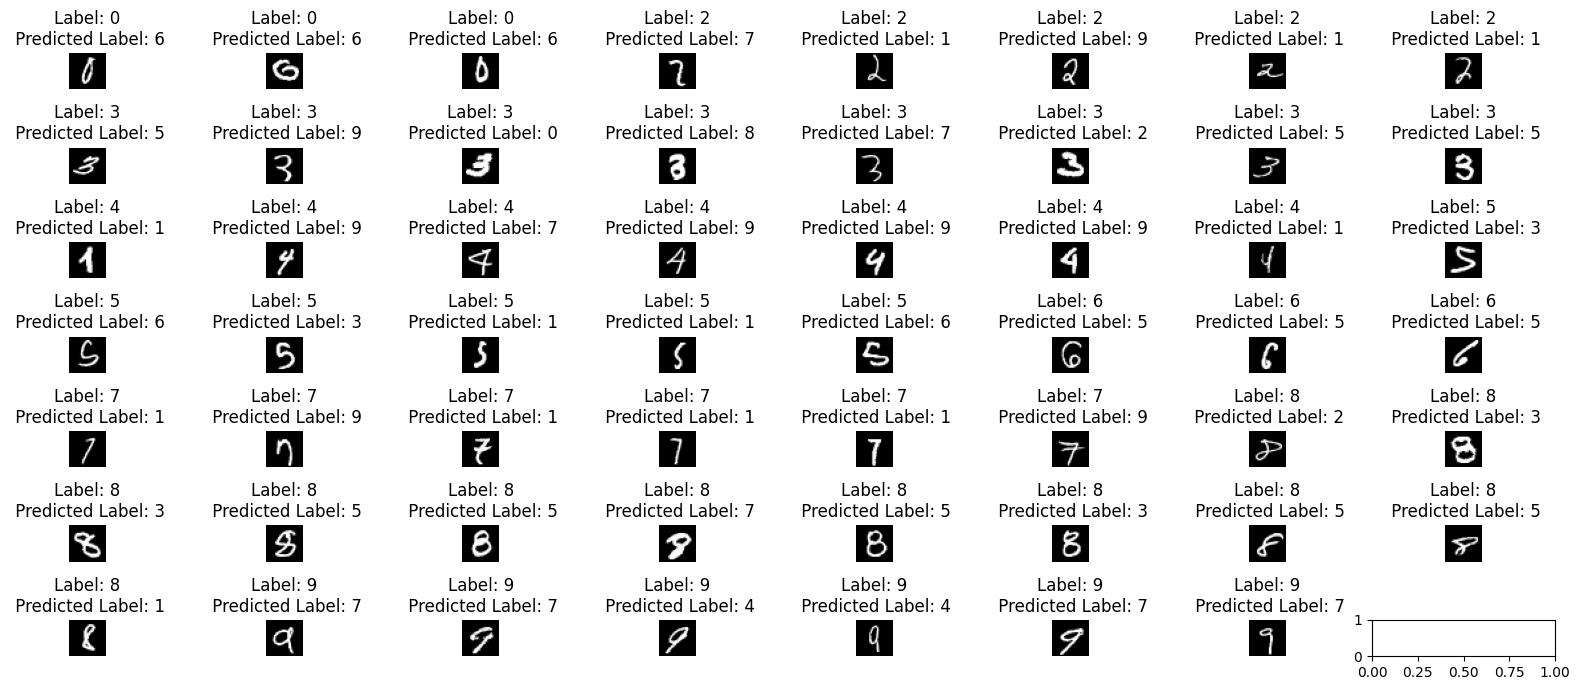

In [394]:
plot_images(incorrect_indexes, test_data, test_labels, knn)

### Jag blev nyfiken på att se siffrorna som modellen gjorde fel på så jag gjorde en funktion för att rita ut den sanna siffran och sedan skriva vad modellen predictar att den ska vara, och en observation är att det känns som att modellen nöjer sig när den hittar en likhet, om man tar vissa 8:or exempelvis så kan dom se väldigt självklara ut men den gissar på 5or och 3or och det antagligen för att man kan ju faktiskt klämma in en 5a eller 3a i en 8a i många fall.

In [384]:
def plot_neighbors(model, new_number, x_train, y_train):
    label_pred = model.predict([new_number])
    print(f'The prediction of the new number is: {label_pred}.')
    nearest = model.kneighbors([new_number], n_neighbors = model.n_neighbors, return_distance = False)
    fig, axs = plt.subplots(math.ceil(len(nearest[0])/5), 5, figsize=(16, math.ceil(len(nearest[0])/5)))
    axs = axs.flatten()
    for i, index in enumerate(nearest[0]):
        img = x_train.values[index].reshape(28,28)
        label = y_train[index]
        axs[i].imshow(img, cmap='gray')
        axs[i].set_title(f"Label: {label}")
        axs[i].axis('off')
    plt.tight_layout()
    plt.show()

### Här kommer det att ritas ut lika många grannar som K-värdet i modellen

c:\Programmering\MachineLearning-SchoolProjects\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Programmering\MachineLearning-SchoolProjects\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


The prediction of the new number is: [6].


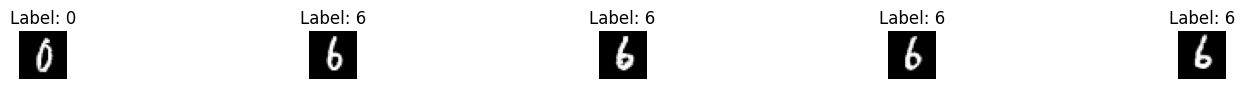

In [395]:
new_number = test_data.iloc[97]
plot_neighbors(knn, new_number, train_data, train_labels)

# VG

### Jag bygger en egen KNN från grunden, nu har jag använt mig av ett par enstaka numpy funktioner som jag anser är okej då dom enbart är där för ett par beräkningar.

In [291]:
from scipy.spatial.distance import cdist
class KNN:
    def __init__(self, k=3, metric='euclidean'):
        self.K = k
        self.metric = metric
    def euc_dist(self, x1, x2):
        return np.sqrt(np.sum(np.square(x1-x2)))
    def manhattan_dist(self, x1, x2):
        return np.sum(np.abs(x1 - x2))
    def fit(self, x_train, y_train):
        self.X_train = x_train
        self.Y_train = y_train
    def predict(self, X_test):
        predictions = [] 
        for i in range(len(X_test)):
            distances = []
            if self.metric == 'manhattan':
                for n in range(len(self.X_train)):
                    distance = self.manhattan_dist(X_test[i],self.X_train[n])
                    distances.append(distance)
            elif self.metric == 'euclidean':
                for n in range(len(self.X_train)):
                    distance = self.euc_dist(X_test[i],self.X_train[n])
                    distances.append(distance)
            else:
                raise TypeError("metric must be a euclidean or manhattan")
            k_indices = np.argsort(distances)[:self.K]
            k_nearest_labels = [self.Y_train[i] for i in k_indices]
            counts = np.bincount(k_nearest_labels)
            best_prediction = np.argmax(counts)
            predictions.append(best_prediction)
        return predictions

In [292]:
knn = KNN(k=5)
knn.fit(train_data.values,train_labels.values)

In [293]:
predictions = knn.predict(test_data.values)

### Efter att ha kört med den vanliga euklidiska formel som även den färdiga modellen kör om man inte ändrar så tar det min laptop dryga 45 sekunder att köra predicten, jag testar att lägga till manhattan formeln för beräkna avståndet då den har lite kortare beräkning, och nu får jag dryga 40 sekunder, så inte så stor skillnad i tid, men min score går ner med 0.015, vilket inte är mycket men tiden kan ju också variera en aning från gång till gång.
### Eftersom att jag har tre loopar i min KNN så är det många beräkningar därav tiden, jag förstår inte riktigt hur den färdiga modellen är klar på nolltid. Jag funderar på om det går att göra alla träningsberäkningar enbart en gång så att varje rad i testdatan inte behöver gå igenom varje rad i träningsdatan, men jag har svårt att skriva det utan att importera funktioner som jag anser vara lite fusk.
### Nu ska jag försöka beskriva tidskomplexiteten nedanför med mina egna ord:
### Vi loopar igenom alla test datan O(n_test) och sedan så ska dom loopas igenom alla träningsdata och tar fram distansen O(n_träning) = O(n_test * n_träning) men eftersom att jag är osäker på om np.sum loopar igenom för att summera eller om dom gör det på något annat sätt så är jag osäker men jag skriver det som en O(log(k)) och då blir det = O(n_test * n_träning * log(k))
### Nu ska jag försöka beskriva det med den faktan vi har fått:
### O(n) är generellt för en loop vilket gör att mina första två loopar med testdata och träningsdata blir O(n^2) eftersom att det blir också när jag har en till loop i testdata loopen så blir det O(n) + O(n) = 2O(n) = O(n) men sedan eftersom att jag är osäker på np.sum om den loopar så är det potentiellt O(n^3) alternativt O(n^2 * log n)
### Intressant att se då det ökade förståelsen för hur lång tid det faktiskt tar.

In [294]:
accuracy_score(test_labels, predictions)

0.945

### Jag får precis samma score som den färdiga modellen i G-delen, även när jag ändrar K värdet i min egna och den färdiga så blir det samma score. Nu är ju den färdiga modellens algoritm inställd på 'auto' så den går igenom vilken den tror är bäst för datasetet men i min så har jag bara en att gå på, men med detta sagt så har jag testat att ställa in den färdiga på olika algoritmer men den visar ett och samma score för samtliga.